In [6]:
import seaborn as sns

df_crashes = sns.load_dataset('car_crashes', index_col='abbrev')
df_crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
...,...,...,...,...,...,...,...
WI,13.8,4.968,4.554,5.382,11.592,670.31,106.62
WY,17.4,7.308,5.568,14.094,15.660,791.14,122.04


In [7]:
from sklearn.linear_model import LinearRegression

features = df_crashes[['alcohol']]
target = df_crashes['total']

model = LinearRegression()
model.fit(X=features, y=target)

df_pred = df_crashes[['alcohol', 'total']].copy()
df_pred['total_pred'] = model.predict(X=features)
df_pred

,alcohol,total,total_pred
abbrev,,,
AL,5.640,18.8,17.321112
AK,4.525,18.1,15.054867
...,...,...,...
WI,4.554,13.8,15.113810
WY,5.568,17.4,17.174771


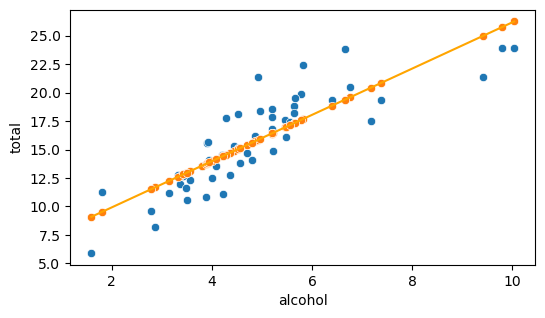

In [8]:
sns.scatterplot(x='alcohol', y='total', data=df_pred)
sns.scatterplot(x='alcohol', y='total_pred', data=df_pred)
sns.lineplot(x='alcohol', y='total_pred', data=df_pred, color='orange');

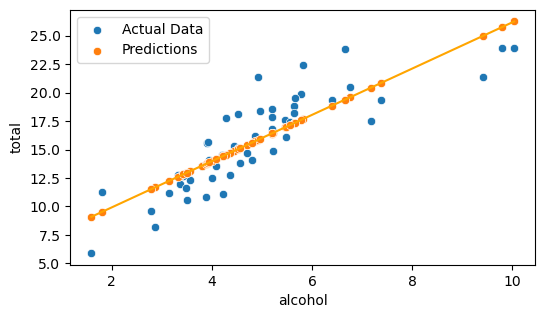

In [9]:
import matplotlib.pyplot as plt

sns.scatterplot(x='alcohol', y='total', data=df_pred, label='Actual Data')
sns.scatterplot(x='alcohol', y='total_pred', data=df_pred, label='Predictions')
sns.lineplot(x='alcohol', y='total_pred', data=df_pred, color='orange')
plt.legend();

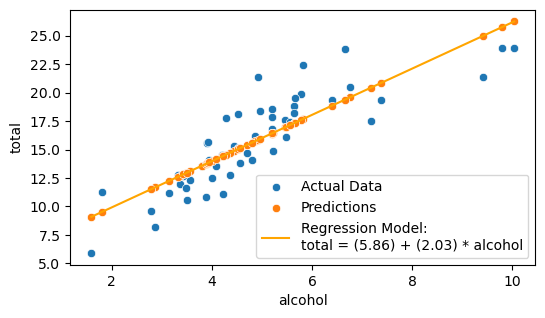

In [10]:
label_model = f'Regression Model:\ntotal = ({model.intercept_.round(2)}) + ({model.coef_[0].round(2)}) * alcohol'

sns.scatterplot(x='alcohol', y='total', data=df_pred, label='Actual Data')
sns.scatterplot(x='alcohol', y='total_pred', data=df_pred, label='Predictions')
sns.lineplot(x='alcohol', y='total_pred', data=df_pred, color='orange', label=label_model)
plt.legend();